**Notebook for training and loading results**

For ease of use and to save you time we've included saved results and models. Please click the following link 

https://drive.google.com/file/d/1pa6dS86sf6dLkFm-Yl32Pt1M11h7OJME/view?usp=sharing

and use the top right button "add shortcut to drive" to add the .zip file to "MyDrive", or a nested folder (but in that case the "path" variable below needs to be changed).

We will now proceed to mount your Google Drive and unzip the .zip into colab memory (your drive won't be affected).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!set path = ""
!unzip 'gdrive/MyDrive/'$path'NLP_lab2folder_Giulio_Luuk.zip'

Archive:  gdrive/MyDrive/NLP_lab2folder_Giulio_Luuk.zip
  inflating: BOW.py                  
   creating: data/
  inflating: data/glove.840B.300d.sst.txt  
  inflating: data/googlenews.word2vec.300d.txt  
   creating: figures/
  inflating: figures/accuracy_by_time.png  
  inflating: figures/coarse_test_accuracy.png  
  inflating: log.csv                 
   creating: logs/
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_0.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_1.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_2.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_3.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_4.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_5.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_6.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_7.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_8.txt  
  inflating: logs/BOW_b03d8372976948acb26ac214848dd0a4_9

In [ ]:
import torch
from torch import optim
import matplotlib.pyplot as plt
from pprint import pprint
from BOW import BOW, CBOW, DeepCBOW, PTDeepCBOW
from LSTM import LSTMClassifier, TreeLSTMClassifier
from utils.training import run_train
from utils.loading import TRAIN_DATA, TEST_DATA, load_sentiment_labels, get_subtrees_dataset
from utils.vocab import get_v
from utils.embeddings import load_pt_embeddings
from utils.mini_batching import prepare_treelstm_minibatch
from utils.evaluation import test_by_length, test_model
from utils.helpers import init_torch, get_saved_results, bin_by_length
device = init_torch()

Using torch 1.10.0+cu111


In [ ]:
i2t, t2i = load_sentiment_labels()

embedding_name = "glove"
epochs = 50
batch_size = 25

v = get_v(TRAIN_DATA)
embed_v, embed_vectors = load_pt_embeddings(embedding_name)

Vocabulary size: 20727


Uncomment any lines in the "train_these" variable to train them when running this notebook. As this takes a significant amount of time, we recommend leaving them commented at first. This loads our results, logs and trained models.

In [ ]:
train_these = {
    # "BOW",
    # "CBOW",
    # "DeepCBOW",
    # "PTDeepCBOW",
    # "LSTMClassifier",
    # "TreeLSTMClassifier",
    # "CSTreeLSTMClassifier",
    # "SubTreeLSTMClassifier",
}
model_colors = {
    "BOW": "red",
    "CBOW": "orange",
    "DeepCBOW": "yellow",
    "PTDeepCBOW": "green",
    "LSTMClassifier": "blue",
    "TreeLSTMClassifier": "darkblue",
    "CSTreeLSTMClassifier": "purple",
    "SubTreeLSTMClassifier": "pink"
}

In [ ]:
# Some dictionaries for storage
models = {}
save_dicts = {}
logging_dicts = {}
correct_by_len = {}
acc_means = {}
acc_stds = {}
acc_means_shuffled = {}
acc_stds_shuffled = {}

In [ ]:
def show_results():
    print(f"{model_name} test acc mean:   ", save_dicts[model_name]['test_acc_mean'])
    print(f"{model_name} test acc std:    ", save_dicts[model_name]['test_acc_std'])

    # This will plot the accuracies across time.
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    for ld in logging_dicts[model_name]:
        train_accuracies = ld['train_accuracies']
        val_accuracies = ld['val_accuracies']
        ax[0].plot(train_accuracies, c='b', alpha=.5)
        ax[0].plot(val_accuracies, c='r', ls="--", alpha=.5)
        ax[1].plot(val_accuracies, c='r', ls="--", alpha=.5)

In [ ]:
model_name = "BOW"
models[model_name] = BOW(len(v.w2i), len(t2i), vocab=v)
print(models[model_name])

models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=0.0005)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(10).tolist(), "None", model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=150, 
    batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])

BOW(
  (embed): Embedding(18280, 5)
)
OrderedDict([('model_name', 'BOW'),
             ('epochs', '300'),
             ('optimizer', 'Adam'),
             ('lr', '0.0005'),
             ('batch_size', '25'),
             ('embedding_name', 'None'),
             ('runs', '10'),
             ('seeds', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'),
             ('test_acc_mean', '0.3561538461538462'),
             ('test_acc_std', '0.011067858503854576'),
             ('time_for_bests',
              '[63.620320320129395, 76.32461476325989, 99.39674663543701, '
              '58.6539671421051, 86.46068286895752, 63.14748930931091, '
              '98.21991324424744, 64.06622672080994, 85.15411019325256, '
              '69.7584707736969]'),
             ('best_epochs',
              '[164, 200, 259, 149, 213, 163, 254, 165, 218, 172]'),
             ('id', 'b03d8372976948acb26ac214848dd0a4')])


BOW test acc mean:    0.3561538461538462
BOW test acc std:     0.011067858503854576


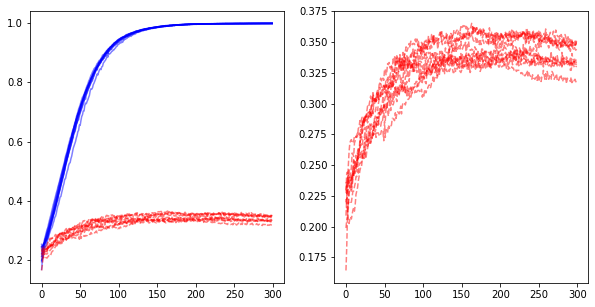

In [ ]:
show_results()

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device)

In [ ]:
model_name = "CBOW"
models[model_name] = CBOW(len(v.w2i), vocab=v, n_classes=len(t2i))
print(models[model_name])

models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=0.0005)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(10).tolist(), "None", model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=50, 
    batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])

CBOW(
  (embed): Embedding(18280, 300)
  (linear): Linear(in_features=300, out_features=5, bias=True)
)
OrderedDict([('model_name', 'CBOW'),
             ('epochs', '50'),
             ('optimizer', 'Adam'),
             ('lr', '0.0005'),
             ('batch_size', '25'),
             ('embedding_name', 'None'),
             ('runs', '10'),
             ('seeds', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'),
             ('test_acc_mean', '0.3686877828054299'),
             ('test_acc_std', '0.01117527976509108'),
             ('time_for_bests',
              '[43.91009473800659, 37.35557150840759, 27.783174991607666, '
              '15.220731019973755, 42.937936544418335, 14.413698196411133, '
              '31.10222339630127, 12.016249895095825, 46.7680299282074, '
              '26.587481021881104]'),
             ('best_epochs', '[45, 36, 26, 15, 43, 13, 31, 11, 47, 26]'),
             ('id', '32548f8e81244898aebfc1aaa865ac83')])


CBOW test acc mean:    0.3686877828054299
CBOW test acc std:     0.01117527976509108


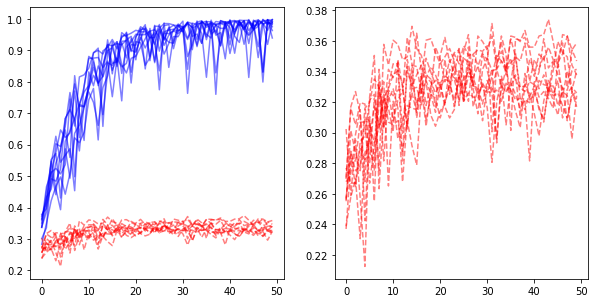

In [ ]:
show_results()

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device)

In [ ]:
model_name = "DeepCBOW"
models[model_name] = DeepCBOW(len(v.w2i), vocab=v, n_classes=len(t2i))
print(models[model_name])

models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=0.0005)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(10).tolist(), "None", model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=150, 
    batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])  

DeepCBOW(
  (embed): Embedding(18280, 300)
  (sequence): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=5, bias=True)
  )
)
OrderedDict([('model_name', 'DeepCBOW'),
             ('epochs', '150'),
             ('optimizer', 'Adam'),
             ('lr', '0.0005'),
             ('batch_size', '25'),
             ('embedding_name', 'None'),
             ('runs', '10'),
             ('seeds', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'),
             ('test_acc_mean', '0.3683710407239819'),
             ('test_acc_std', '0.00994127018082154'),
             ('time_for_bests',
              '[45.983811140060425, 146.8894772529602, 25.207690954208374, '
              '43.83348870277405, 23.900448322296143, 31.076801776885986, '
              '33.542824268341064, 69.99863171577454, 161.8497278690338, '
              '130.76722884178162]'),


DeepCBOW test acc mean:    0.3683710407239819
DeepCBOW test acc std:     0.00994127018082154


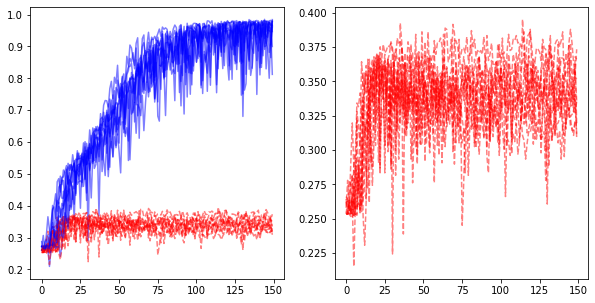

In [ ]:
show_results()

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device)

In [ ]:
model_name = "PTDeepCBOW"
# Create a Deep CBOW model with pre-trained embeddings
models[model_name] = PTDeepCBOW(len(embed_v.w2i), embed_v, len(t2i))

# copy pre-trained word vectors into embeddings table
# and disable training the pre-trained embeddings
models[model_name].embed.weight.data.copy_(torch.from_numpy(embed_vectors))
models[model_name].embed.weight.requires_grad = False

# train the model
print(models[model_name])

# move model to specified device
models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=0.0005)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(10).tolist(), embedding_name, model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=epochs, 
      batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])

PTDeepCBOW(
  (embed): Embedding(20727, 300)
  (sequence): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=5, bias=True)
  )
)
OrderedDict([('model_name', 'PTDeepCBOW'),
             ('epochs', '50'),
             ('optimizer', 'Adam'),
             ('lr', '0.0005'),
             ('batch_size', '25'),
             ('embedding_name', 'glove'),
             ('runs', '10'),
             ('seeds', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'),
             ('test_acc_mean', '0.45176470588235296'),
             ('test_acc_std', '0.00545319272223813'),
             ('time_for_bests',
              '[2.048590898513794, 3.9179818630218506, 5.158902406692505, '
              '2.5591766834259033, 6.551894903182983, 3.926136016845703, '
              '2.5626604557037354, 5.2009172439575195, 5.146272420883179, '
              '3.2701711654663086]

PTDeepCBOW test acc mean:    0.45176470588235296
PTDeepCBOW test acc std:     0.00545319272223813


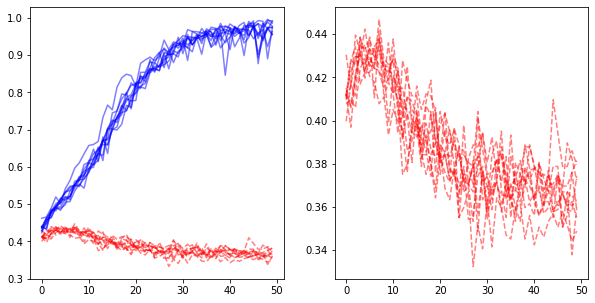

In [ ]:
show_results()

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device)

In [ ]:
model_name = "LSTMClassifier"
models[model_name] = LSTMClassifier(len(embed_v.w2i), 300, 168, len(t2i), embed_v)

# copy pre-trained word vectors into embeddings table
with torch.no_grad():
  models[model_name].embed.weight.data.copy_(torch.from_numpy(embed_vectors))
  models[model_name].embed.weight.requires_grad = False

print(models[model_name])

models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=3e-4)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(10).tolist(), embedding_name, model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=epochs, 
      batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])

LSTMClassifier(
  (embed): Embedding(20727, 300, padding_idx=1)
  (rnn): MyLSTMCell(300, 168)
  (output_layer): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=168, out_features=5, bias=True)
  )
)
OrderedDict([('model_name', 'LSTMClassifier'),
             ('epochs', '50'),
             ('optimizer', 'Adam'),
             ('lr', '0.0003'),
             ('batch_size', '25'),
             ('embedding_name', 'glove'),
             ('runs', '10'),
             ('seeds', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'),
             ('test_acc_mean', '0.4637556561085973'),
             ('test_acc_std', '0.00583499909430147'),
             ('time_for_bests',
              '[96.39480686187744, 131.7605230808258, 105.00867533683777, '
              '134.62388014793396, 143.7363681793213, 100.86118721961975, '
              '92.41143918037415, 118.33811473846436, 122.92045021057129, '
              '108.19052648544312]'),
             ('best_epochs', '[10, 14, 12, 15, 16, 11, 1

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device)

In [ ]:
acc_means_shuffled[model_name], acc_stds_shuffled[model_name] = test_model(models[model_name], save_dicts[model_name], TEST_DATA, device, shuffle=True)

In [ ]:
print(f"{model_name} test acc mean:             ", acc_means[model_name])
print(f"{model_name} test acc std:              ", acc_stds[model_name])
print(f"{model_name} shuffled test acc mean:    ", acc_means_shuffled[model_name])
print(f"{model_name} shuffled test acc std:     ", acc_stds_shuffled[model_name])

LSTMClassifier test acc mean:              tensor(0.4638)
LSTMClassifier test acc std:               tensor(0.0062)
LSTMClassifier shuffled test acc mean:     tensor(0.4352)
LSTMClassifier shuffled test acc std:      tensor(0.0100)


In [ ]:
# Now let's train the Tree LSTM!
model_name = "TreeLSTMClassifier"
models[model_name] = TreeLSTMClassifier(len(embed_v.w2i), 300, 150, len(t2i), embed_v)

with torch.no_grad():
  models[model_name].embed.weight.data.copy_(torch.from_numpy(embed_vectors))
  models[model_name].embed.weight.requires_grad = False

print(models[model_name])

models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=2e-4)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(3).tolist(), embedding_name, model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=epochs, 
      prep_fn=prepare_treelstm_minibatch,
      batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])    

TreeLSTMClassifier(
  (embed): Embedding(20727, 300, padding_idx=1)
  (treelstm): TreeLSTM(
    (reduce): TreeLSTMCell(300, 150)
    (proj_x): Linear(in_features=300, out_features=150, bias=True)
    (proj_x_gate): Linear(in_features=300, out_features=150, bias=True)
    (buffers_dropout): Dropout(p=0.5, inplace=False)
  )
  (output_layer): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=150, out_features=5, bias=True)
  )
)
OrderedDict([('model_name', 'TreeLSTMClassifier'),
             ('epochs', '50'),
             ('optimizer', 'Adam'),
             ('lr', '0.0002'),
             ('batch_size', '25'),
             ('embedding_name', 'glove'),
             ('runs', '3'),
             ('seeds', '[0, 1, 2]'),
             ('test_acc_mean', '0.47254901960784307'),
             ('test_acc_std', '0.003791796407232727'),
             ('time_for_bests',
              '[214.91839146614075, 334.3550343513489, 465.1385042667389]'),
             ('best_epochs', '

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device,
    prep_fn=prepare_treelstm_minibatch)

In [21]:
SUBTREE_TRAIN_DATA = list(get_subtrees_dataset(TRAIN_DATA))

In [23]:
print("original training set size: ", len(TRAIN_DATA))
print("subtree training set size: ", len(SUBTREE_TRAIN_DATA))

original training set size:  8544
subtree training set size:  318582


In [ ]:
model_name = "SubTreeLSTMClassifier"
models[model_name] = TreeLSTMClassifier(len(embed_v.w2i), 300, 150, len(t2i), embed_v)

with torch.no_grad():
  models[model_name].embed.weight.data.copy_(torch.from_numpy(embed_vectors))
  models[model_name].embed.weight.requires_grad = False

print(models[model_name])

models[model_name] = models[model_name].to(device)
print(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=2e-4)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(3).tolist(), embedding_name, model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=7, 
      prep_fn=prepare_treelstm_minibatch,
      batch_size=batch_size,
      train_data=SUBTREE_TRAIN_DATA)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])

TreeLSTMClassifier(
  (embed): Embedding(20727, 300, padding_idx=1)
  (treelstm): TreeLSTM(
    (reduce): TreeLSTMCell(300, 150)
    (proj_x): Linear(in_features=300, out_features=150, bias=True)
    (proj_x_gate): Linear(in_features=300, out_features=150, bias=True)
    (buffers_dropout): Dropout(p=0.5, inplace=False)
  )
  (output_layer): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=150, out_features=5, bias=True)
  )
)
cuda
OrderedDict([('model_name', 'SubTreeLSTMClassifier'),
             ('epochs', '7'),
             ('optimizer', 'Adam'),
             ('lr', '0.0002'),
             ('batch_size', '25'),
             ('embedding_name', 'glove'),
             ('runs', '3'),
             ('seeds', '[0, 1, 2]'),
             ('test_acc_mean', '0.5122171945701357'),
             ('test_acc_std', '0.0030241233266611388'),
             ('time_for_bests',
              '[2798.3155722618103, 3261.6997363567352, 2800.8372523784637]'),
             ('best_e

SubTreeLSTMClassifier test acc mean:    0.5122171945701357
SubTreeLSTMClassifier test acc std:     0.0030241233266611388


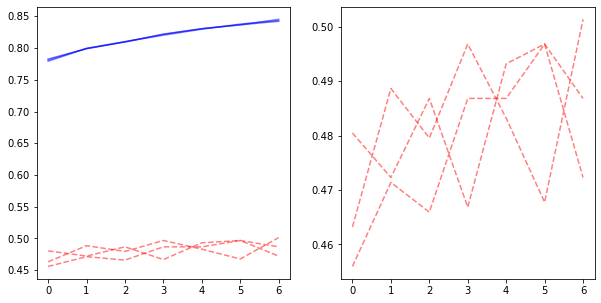

In [ ]:
show_results()

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device,
    prep_fn=prepare_treelstm_minibatch)

In [ ]:
from LSTM import CSumTreeLSTMCell
model_name = "CSTreeLSTMClassifier"
models[model_name] = TreeLSTMClassifier(len(embed_v.w2i), 300, 150, len(t2i), embed_v, cell_class=CSumTreeLSTMCell)

with torch.no_grad():
  models[model_name].embed.weight.data.copy_(torch.from_numpy(embed_vectors))
  models[model_name].embed.weight.requires_grad = False

print(models[model_name])

models[model_name] = models[model_name].to(device)

if model_name in train_these:
  optimizer = optim.Adam(models[model_name].parameters(), lr=2e-4)
  save_dicts[model_name], logging_dicts[model_name] = run_train(torch.arange(3).tolist(), embedding_name, model_name=model_name,
    model=models[model_name], optimizer=optimizer, epochs=30, 
      prep_fn=prepare_treelstm_minibatch,
      batch_size=batch_size)
else:
  save_dicts[model_name], logging_dicts[model_name] = get_saved_results({"model_name": model_name})
  pprint(save_dicts[model_name])

TreeLSTMClassifier(
  (embed): Embedding(20727, 300, padding_idx=1)
  (treelstm): TreeLSTM(
    (reduce): CSumTreeLSTMCell(
      (reduce_layer): Linear(in_features=150, out_features=750, bias=True)
      (dropout_layer): Dropout(p=0.25, inplace=False)
    )
    (proj_x): Linear(in_features=300, out_features=150, bias=True)
    (proj_x_gate): Linear(in_features=300, out_features=150, bias=True)
    (buffers_dropout): Dropout(p=0.5, inplace=False)
  )
  (output_layer): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=150, out_features=5, bias=True)
  )
)
OrderedDict([('model_name', 'CSTreeLSTMClassifier'),
             ('epochs', '30'),
             ('optimizer', 'Adam'),
             ('lr', '0.0002'),
             ('batch_size', '25'),
             ('embedding_name', 'glove'),
             ('runs', '3'),
             ('seeds', '[0, 1, 2]'),
             ('test_acc_mean', '0.47677224736048257'),
             ('test_acc_std', '0.0018595517354356062'),
      

CSTreeLSTMClassifier test acc mean:    0.47677224736048257
CSTreeLSTMClassifier test acc std:     0.0018595517354356062


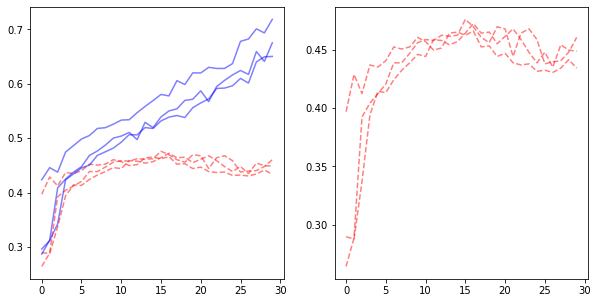

In [ ]:
show_results()

In [ ]:
correct_by_len[model_name], total_by_len, acc_means[model_name], acc_stds[model_name] = test_by_length(
    models[model_name], save_dicts[model_name], TEST_DATA, device,
    prep_fn=prepare_treelstm_minibatch)

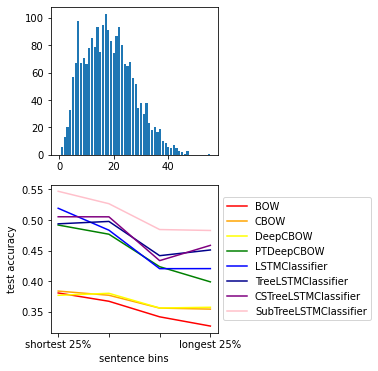

In [ ]:
# See if sentence length has an effect
fig, ax = plt.subplots(2, 1, figsize=(3, 6))
ax[0].bar(range(len(total_by_len)), total_by_len)
# ax[2].bar(range(len(total_by_len)), correct_by_len[model_name]/total_by_len)

amount_of_bins = 4
for model_name in model_colors.keys():
    bins, bin_size = bin_by_length(correct_by_len[model_name], total_by_len*int(save_dicts[model_name]['runs']), amount_of_bins)

    ax[1].plot(bins, color=model_colors[model_name])

ax[1].set_xticks(torch.arange(amount_of_bins))
# xtick_labels = [f"{f} to {f+bin_size}" for f in torch.arange(0, (amount_of_bins)*bin_size, bin_size)]
xtick_labels = ["shortest 25%", "", "", "longest 25%"]
ax[1].set_xticklabels(xtick_labels)
ax[1].set_xlabel("sentence bins")
ax[1].set_ylabel("test accuracy")
ax[1].legend(model_colors.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# Test all models on coarse grained evaluation
# This is implemented by adding correctness if the model predicted the label
# one away from the ground truth
coarse_test_acc_mean = {}
coarse_test_acc_std = {}
for model_name, model in models.items():
    kwargs = {"model": model, "save_dict": save_dicts[model_name], "data": TEST_DATA, "device": device}
    if "Tree" in model_name:
        kwargs.update({"prep_fn": prepare_treelstm_minibatch})
    coarse_test_acc_mean[model_name], coarse_test_acc_std[model_name] = test_model(coarse=.5, **kwargs)

Text(0.5, 0, 'test accuracy')

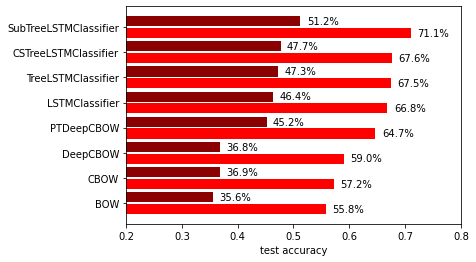

In [ ]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    https://gist.github.com/ptbrowne/3fcae7fb6e9db3960ff3af0a9d6ecffb
    """
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + rect.get_width() + .04, rect.get_y() + rect.get_height()/2.,
                f'{width*100:.1f}%',
                ha='center', va='center')

colors = ["red", "darkred"]

for i, model_name in enumerate(model_colors.keys()):
    mean = coarse_test_acc_mean[model_name]
    width = .4
    offset = width/12
    plt.barh(model_name, 0)
    bar = plt.barh(i-width/2-offset, mean, width, color=colors[0])
    autolabel(bar)
    bar = plt.barh(i+width/2+offset, acc_means[model_name], width, color=colors[1])
    autolabel(bar)
plt.xlim(.2, .8)
plt.xlabel("test accuracy")

Text(0, 0.5, 'test accuracy')

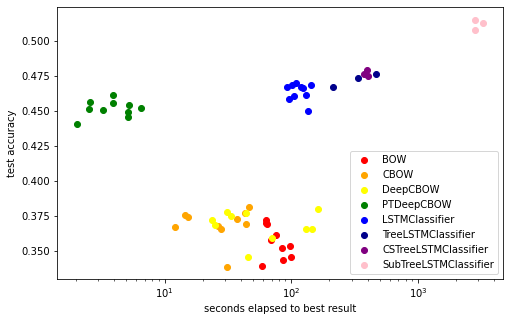

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for model_name in model_colors.keys():
    logging_dict = logging_dicts[model_name]
    xs, ys = [], []
    for run in logging_dict:
        xs.append(run['time_for_best'])
        ys.append(run['test_acc'])
    ax.scatter(xs, ys, color=model_colors[model_name], label=model_name)
ax.set_xscale('log')  
ax.legend()
ax.set_xlabel("seconds elapsed to best result")
ax.set_ylabel("test accuracy")